# Jamboree Education - Linear Regression

# About Jamboree

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


# Column Profiling:
- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)


# Concept Used:
- Exploratory Data Analysis
- Linear Regression


# Problem Statement
- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
- Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
- Use Non-graphical and graphical analysis for getting inferences about variables.
> - This can be done by checking the distribution of variables of graduate applicants.
- Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
- Check correlation among independent variables and how they interact with each other.
- Use Linear Regression from (Statsmodel library) and explain the results.
- Test the assumptions of linear regression:
> - Multicollinearity check by VIF score
> - Mean of residuals
> - Linearity of variables (no pattern in residual plot)
> - Test for Homoscedasticity
> - Normality of residuals
- Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
- Provide actionable Insights & Recommendations
- Try out different Linear Regressions


In [1]:
#importing libraries for our purpose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("Jamboree_Admission.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
#No of Rows and columns in data
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 500
Number of columns: 9


In [4]:
#number of unique values in our data
for i in df.columns:
    print(i,'minimum',':',min(df[i]))
    print(i,'maximum',':',max(df[i]))

Serial No. minimum : 1
Serial No. maximum : 500
GRE Score minimum : 290
GRE Score maximum : 340
TOEFL Score minimum : 92
TOEFL Score maximum : 120
University Rating minimum : 1
University Rating maximum : 5
SOP minimum : 1.0
SOP maximum : 5.0
LOR  minimum : 1.0
LOR  maximum : 5.0
CGPA minimum : 6.8
CGPA maximum : 9.92
Research minimum : 0
Research maximum : 1
Chance of Admit  minimum : 0.34
Chance of Admit  maximum : 0.97


In [5]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
# checking null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
for i in df.columns:
    print(i,':',df[i].nunique())

Serial No. : 500
GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


In [8]:
#checking datatypes
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
#No of Rows and columns in data
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 500
Number of columns: 9


In [10]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].unique())

Serial No. : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 2

In [11]:
#Value counts
for i in df.columns:
 print(i,':',df[i].value_counts())

Serial No. : 1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: Serial No., Length: 500, dtype: int64
GRE Score : 312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE Score, dtype: int64
TOEFL Score : 110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: TO

In [12]:
#columns in data
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
#Shape of data
df.shape

(500, 9)

In [14]:
# Checking for duplicates
df.duplicated().value_counts()

False    500
dtype: int64

In [15]:
#checking null values in every column of our data
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [16]:
#Making serial no as the index column 
df=df.set_index('Serial No.')

In [17]:
#Changing the name of the column for the future needs
df.rename(columns = {'GRE Score':'GRE_Score'}, inplace = True)
df.rename(columns = {'TOEFL Score':'TOEFL_Score'}, inplace = True)
df.rename(columns = {'University Rating':'University_Rating'}, inplace = True)
df.rename(columns = {'SOP':'SOP'}, inplace = True)
df.rename(columns = {'LOR ':'LOR'}, inplace = True)
df.rename(columns = {'CGPA':'CGPA'}, inplace = True)
df.rename(columns = {'Research':'Research'}, inplace = True)
df.rename(columns = {'Chance of Admit ':'Chance_of_Admit'}, inplace = True)

In [18]:
df

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [19]:
#Description of data
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [20]:
#Description of data
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
GRE_Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL_Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University_Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance_of_Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


# Relationship with different variable columns

In [144]:
df.corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


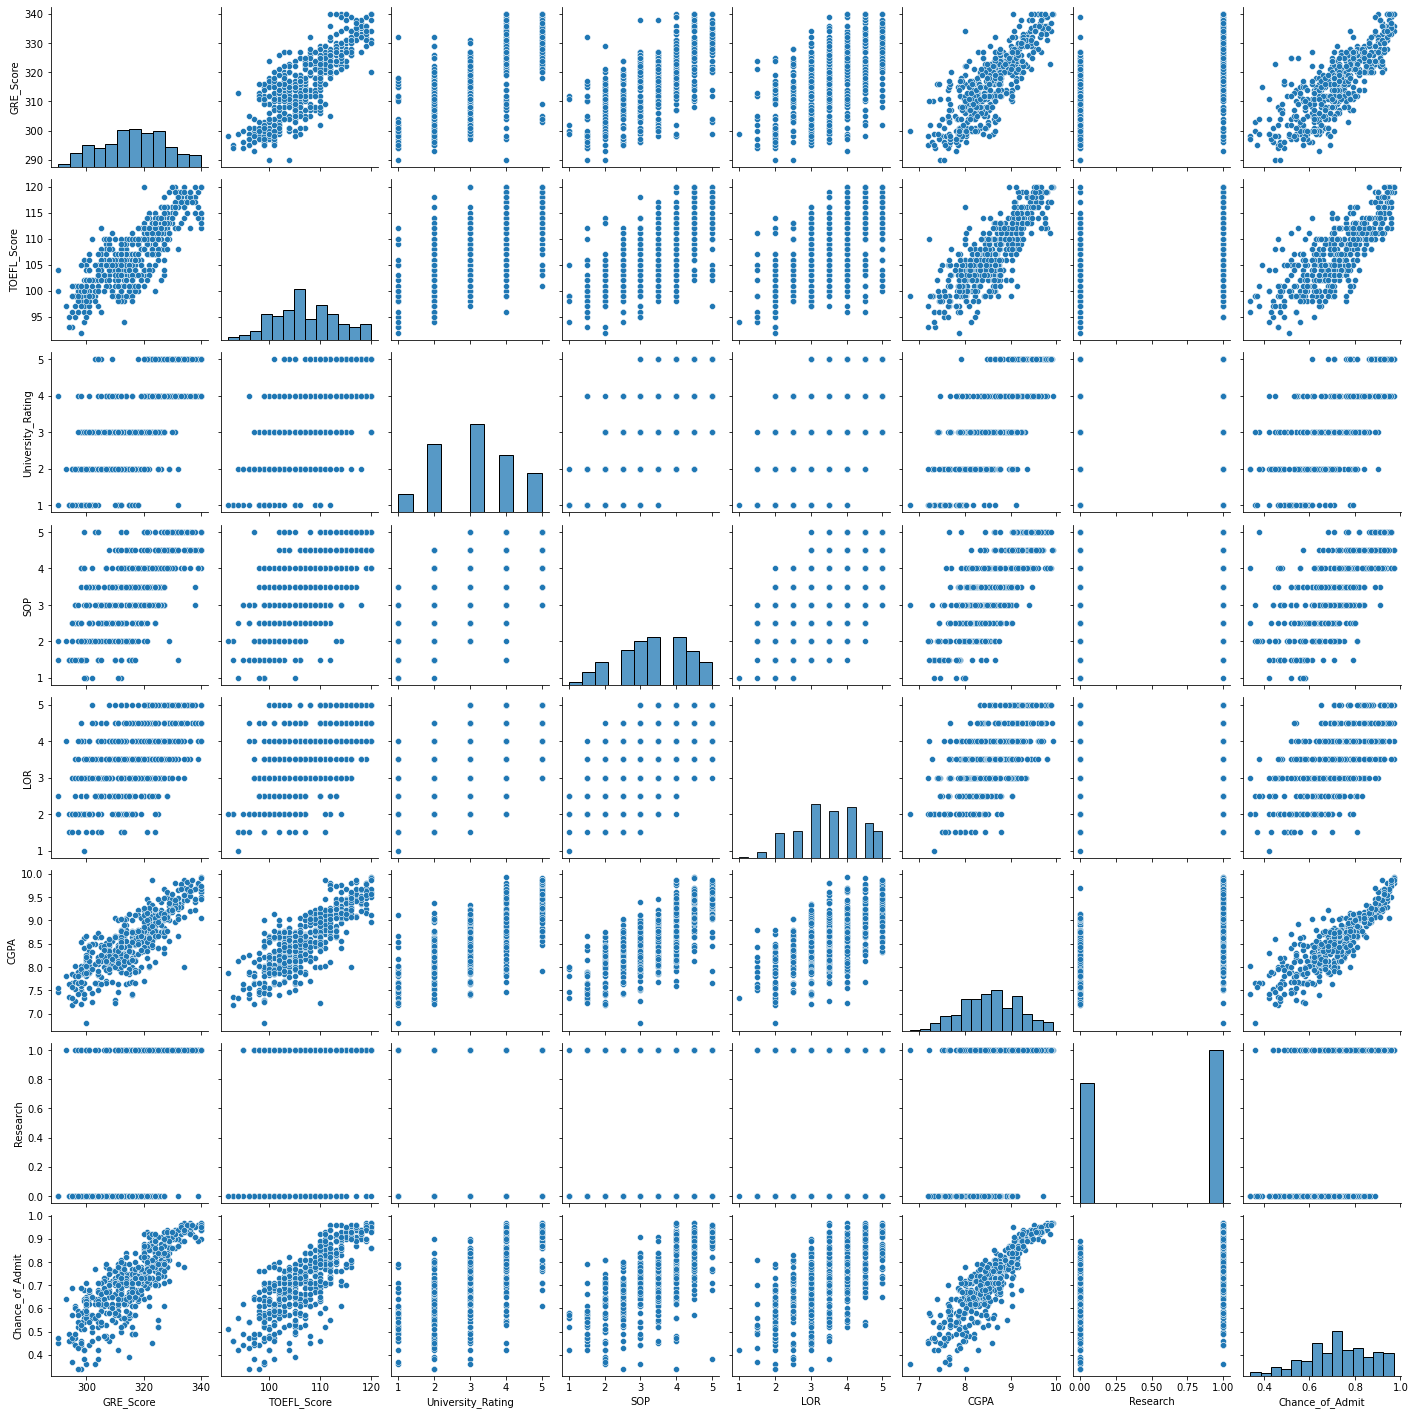

In [143]:
sns.pairplot(data=df,palette='set2')
plt.show()

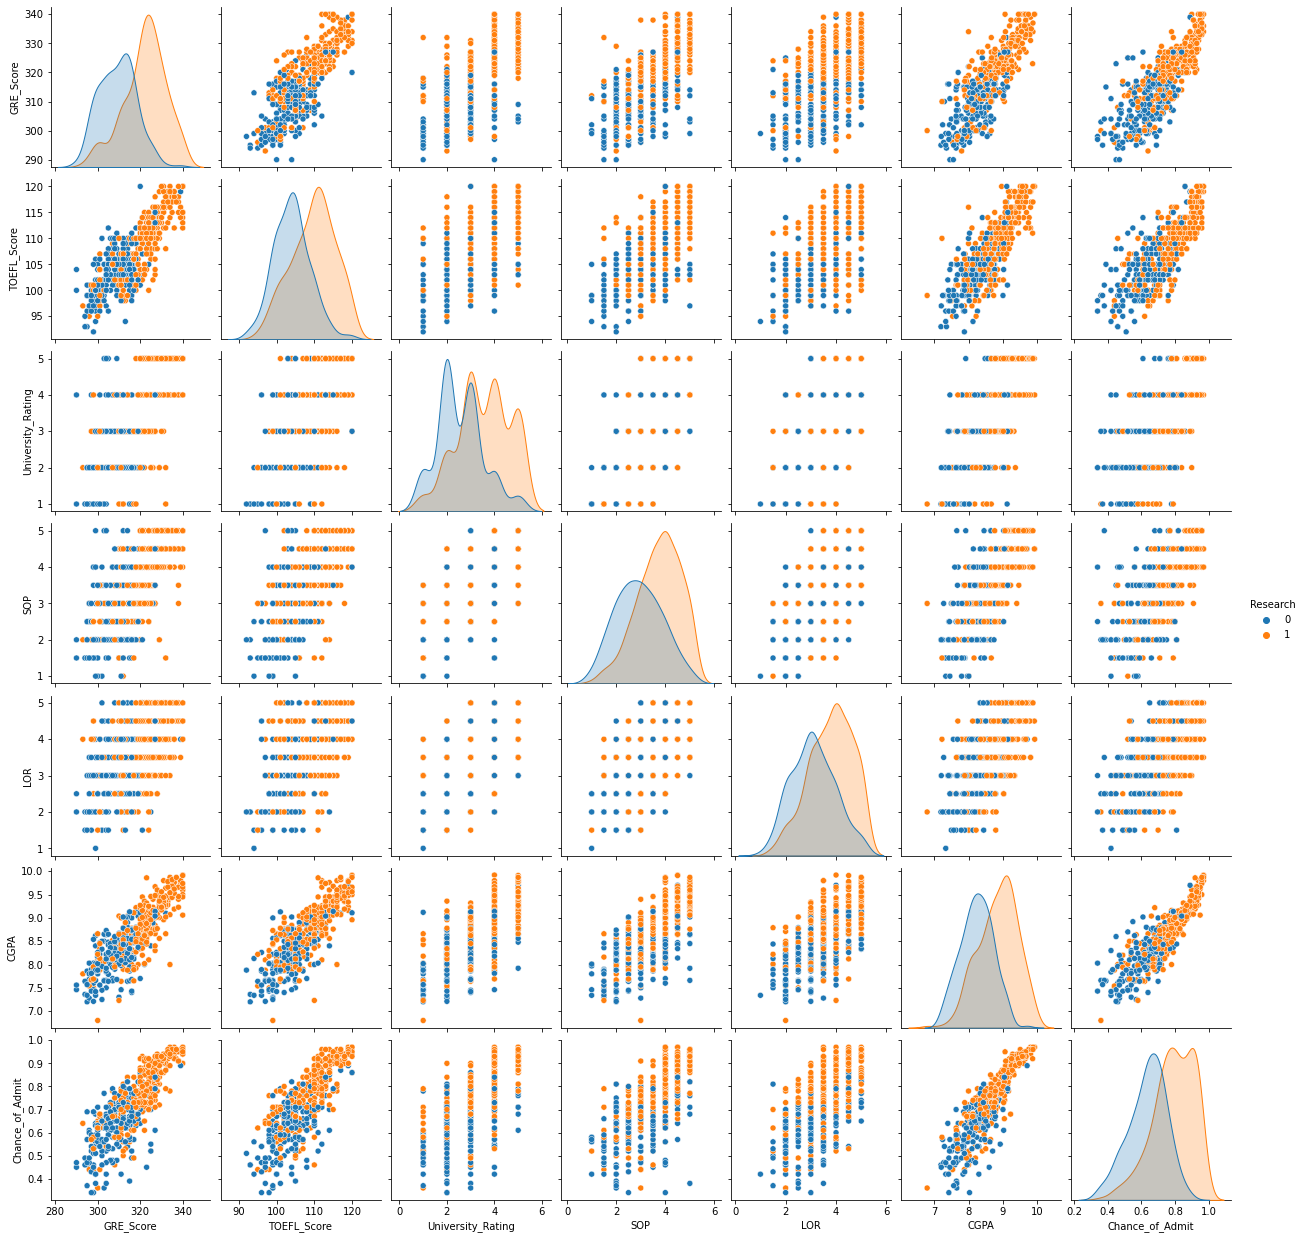

In [141]:
sns.pairplot(df,hue='Research')

- We can see positive relationship between Chance of Admit & all the numerical variables.

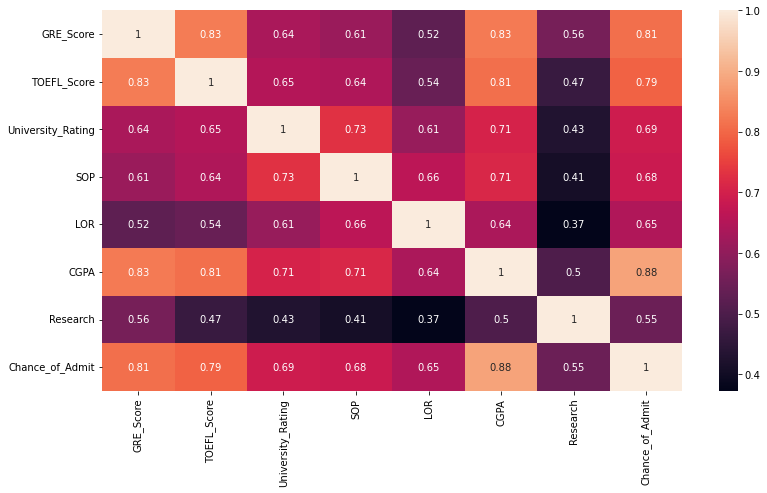

In [22]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

- Chance of admit has higher correlation with CGPA
- Chance of admit has higher correlation with GRE score the TOFEL score
- GRE score with TOFEL score has higher correlation

# Univariate analysis

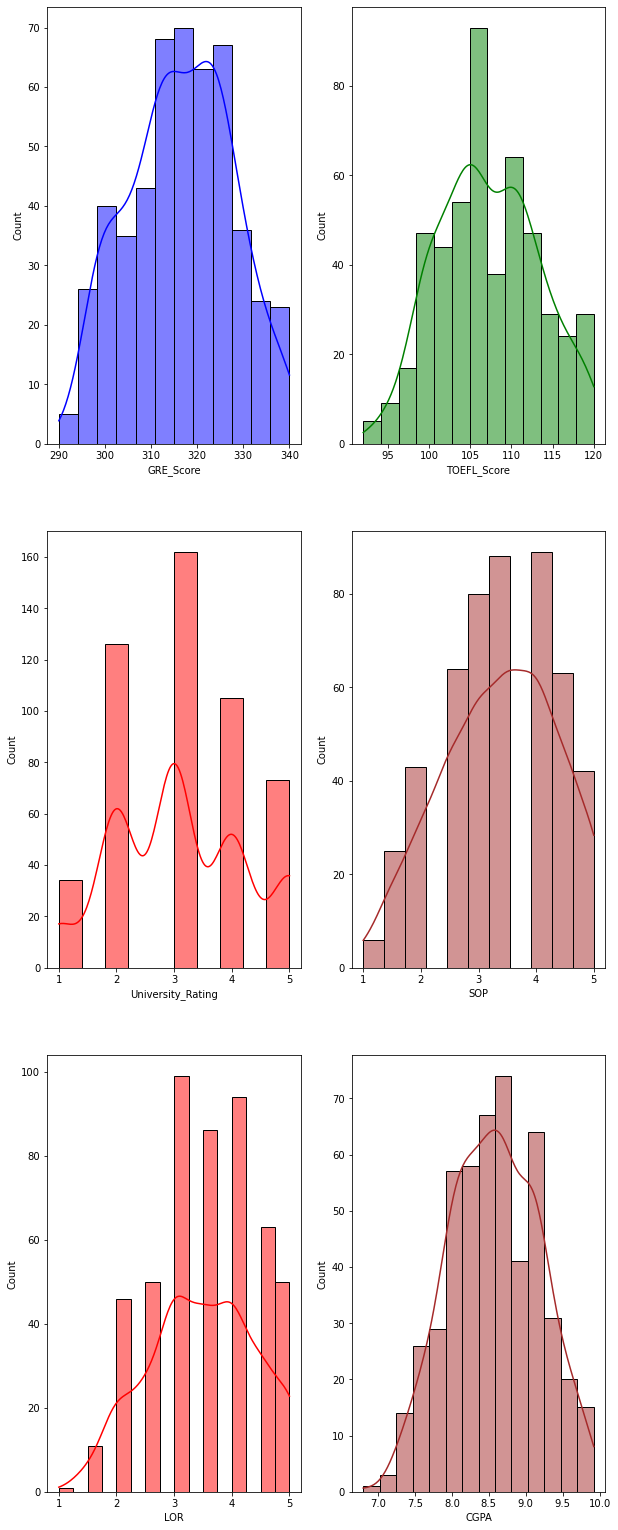

In [24]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
fig.subplots_adjust(top=1.5)
sns.histplot(data=df, x="GRE_Score", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=df, x="TOEFL_Score", kde=True,color="green", ax=axis[0,1])
sns.histplot(data=df, x="University_Rating", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=df, x="SOP", kde=True,color="brown", ax=axis[1,1])
sns.histplot(data=df, x="LOR", kde=True,color="red", ax=axis[2,0])
sns.histplot(data=df, x="CGPA", kde=True,color="brown", ax=axis[2,1])
plt.show()

- GRE Score 310-320 have the highest count and it ranging from 290 to 340
- TOEFL Score 105 have the highest count and it ranging from 95 to 120
- Highest university rating for 3
- In LOR 3-4 have the highest count
- here CGPA is ranging from 7 to 10 

# Research Prediction

<AxesSubplot:ylabel='Research'>

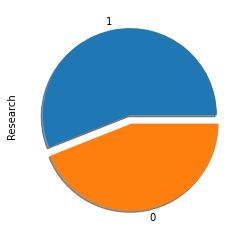

In [25]:
df.Research.value_counts().plot(kind='pie',shadow=True,explode=(0,0.1))

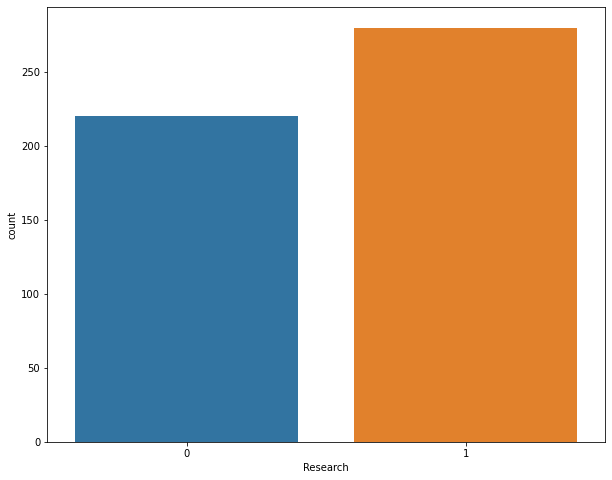

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Research', data = df)
plt.show()

- Most of the perons got researched

# Box plot for the numerical variables

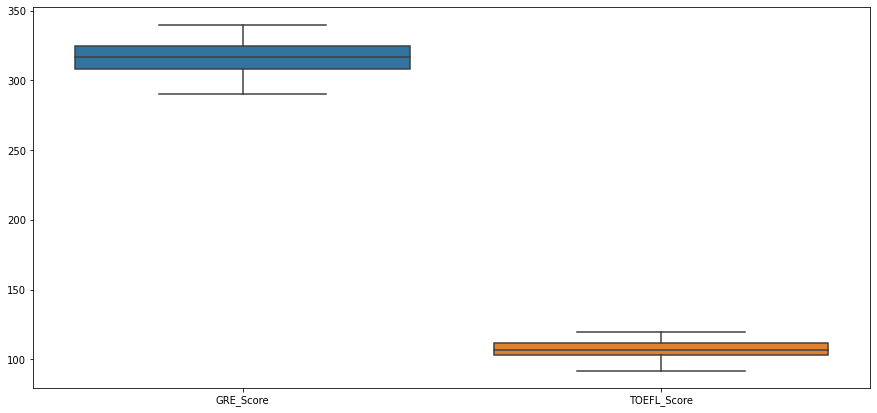

In [27]:
plt.figure(figsize=(15,7))
attrs=['GRE_Score','TOEFL_Score']
sns.boxplot(data=df[['GRE_Score','TOEFL_Score']])
plt.show()

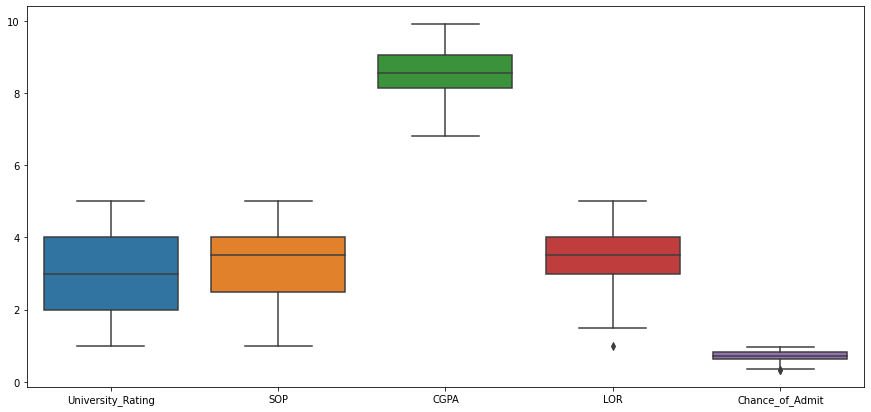

In [28]:
plt.figure(figsize=(15,7))
attrs=['University_Rating','SOP','CGPA','LOR','Chance_of_Admit']
sns.boxplot(data=df[['University_Rating','SOP','CGPA','LOR','Chance_of_Admit']])
plt.show()

- From the above plot only LOR have one outlier all the others are free from outliers

## Mean GRE_Score with respect to University_Rating

In [29]:
df.groupby('University_Rating')['GRE_Score'].mean()

University_Rating
1    304.911765
2    309.134921
3    315.030864
4    323.304762
5    327.890411
Name: GRE_Score, dtype: float64

<AxesSubplot:xlabel='University_Rating'>

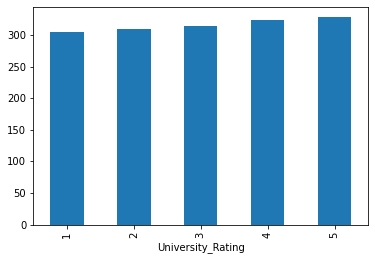

In [30]:
df.groupby('University_Rating')['GRE_Score'].mean().plot(kind='bar')

- GRE Score increasing with University rating
- university rating 5 has highest mean GRE score
- university rating 1 has lowest mean GRE score

## Mean TOEFL_Score with respect to University_Rating

In [31]:
df.groupby('University_Rating')['TOEFL_Score'].mean()

University_Rating
1    100.205882
2    103.444444
3    106.314815
4    110.961905
5    113.438356
Name: TOEFL_Score, dtype: float64

<AxesSubplot:xlabel='University_Rating'>

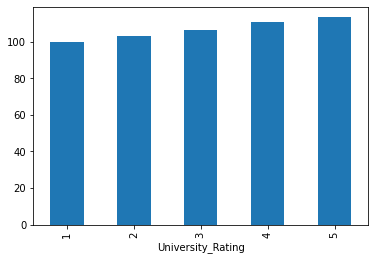

In [32]:
df.groupby('University_Rating')['TOEFL_Score'].mean().plot(kind='bar')

- TOEFL_Score increasing with University rating
- university rating 5 has highest mean TOEFL_Score
- university rating 1 has lowest mean TOEFL_Score

## Mean SOP with respect to University_Rating

In [33]:
df.groupby('University_Rating')['SOP'].mean()

University_Rating
1    1.941176
2    2.682540
3    3.308642
4    4.000000
5    4.479452
Name: SOP, dtype: float64

<AxesSubplot:xlabel='University_Rating'>

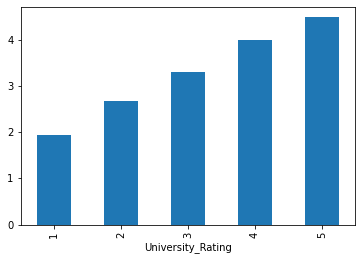

In [34]:
df.groupby('University_Rating')['SOP'].mean().plot(kind='bar')

- SOP increasing with University rating
- university rating 5 has highest mean SOP
- university rating 1 has lowest mean SOP,

## Mean SOP with respect to University_Rating

In [35]:
df.groupby('University_Rating')['CGPA'].mean()

University_Rating
1    7.798529
2    8.177778
3    8.500123
4    8.936667
5    9.278082
Name: CGPA, dtype: float64

<AxesSubplot:xlabel='University_Rating'>

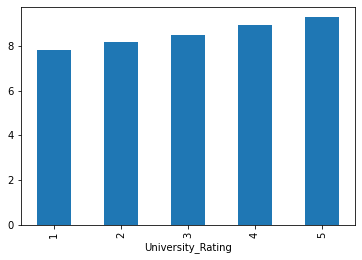

In [36]:
df.groupby('University_Rating')['CGPA'].mean().plot(kind='bar')

- CGPA increasing with University rating
- university rating 5 has highest mean CGPA
- university rating 1 has lowest mean CGPA,

## University Rating with respect to GRE_Score

[]

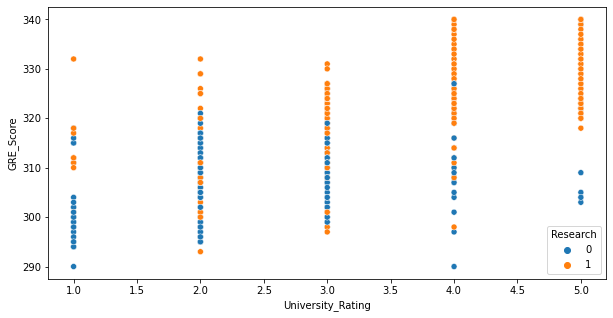

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='University_Rating',y='GRE_Score',data=df,hue='Research')
plt.plot()

## University Rating with Respect to GRE_Score

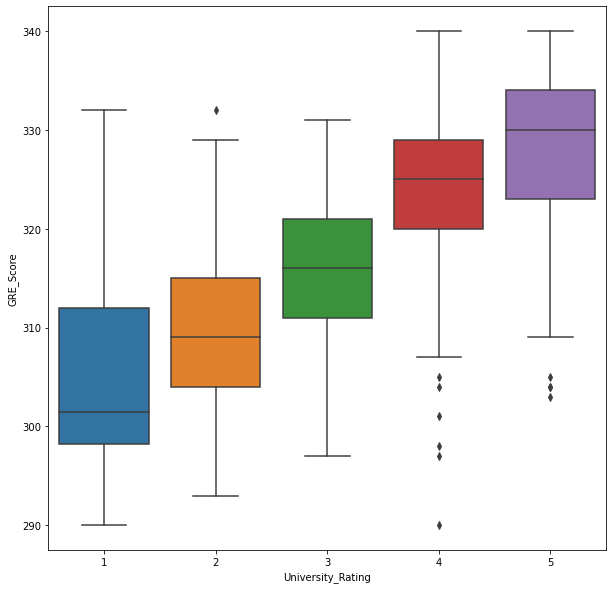

In [38]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'University_Rating', y = 'GRE_Score', data = df)
plt.show()

- From the above we can see the increasing rate of different University rating with respect to GRE_Score

## University Rating with Respect to TOEFL_Score

[]

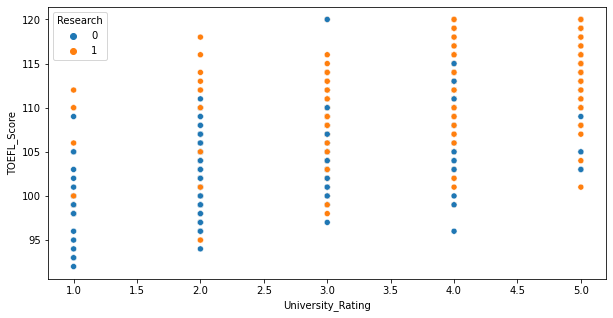

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='University_Rating',y='TOEFL_Score',data=df,hue='Research')
plt.plot()

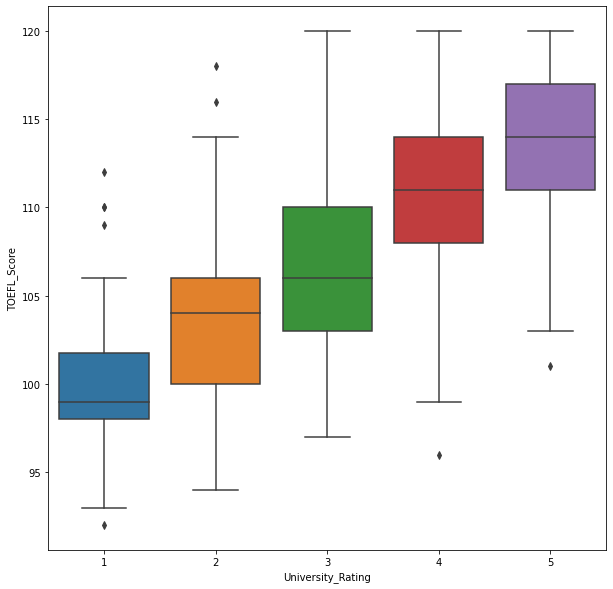

In [40]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'University_Rating', y = 'TOEFL_Score', data = df)
plt.show()

- From the above we can see the increasing rate of different University rating with respect to TOEFL_Score

## Correlation of CGPA with respect to Chance of Admit

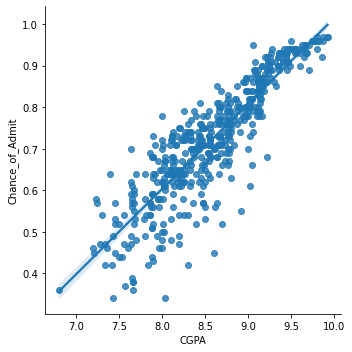

In [41]:
sns.lmplot(x='CGPA', y='Chance_of_Admit', data=df)

- Chance of admit and CGPA are highly correlated

# Bivariate Analysis

In [45]:
cat_cols = ['University_Rating', 'SOP', 'LOR', 'Research']
num_cols = ['GRE_Score', 'TOEFL_Score', 'CGPA']
target = 'Chance_of_Admit'

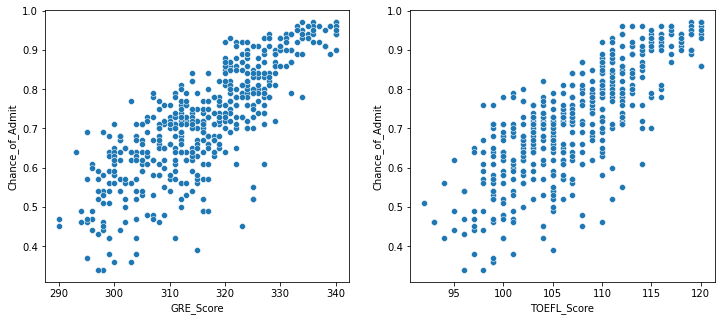

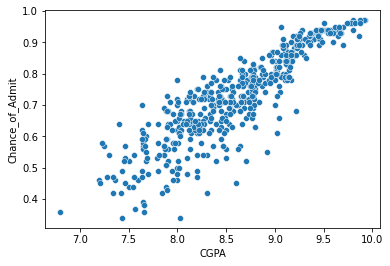

In [44]:
# check relation bw continuous variables & target variable
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x=num_cols[0], y=target, data=df, ax=axs[0])
sns.scatterplot(x=num_cols[1], y=target, data=df, ax=axs[1])
plt.show()
sns.scatterplot(x=num_cols[2], y=target, data=df)
plt.show()

- Seems like there is a linear correlation between the continuous variables and the target variable.

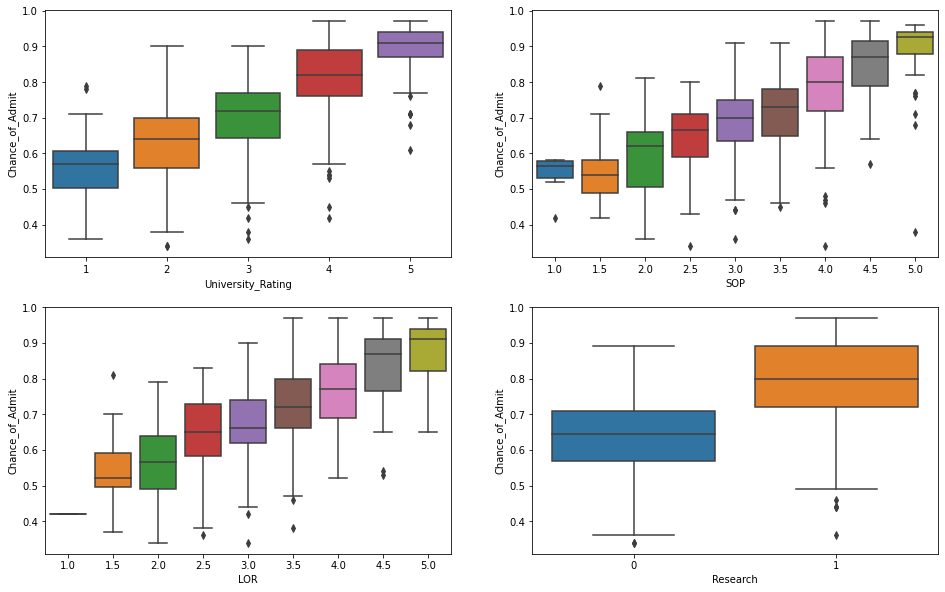

In [47]:
rows,cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_cols[index], y=target, data=df, ax=axs[row,col])
        index += 1

- As you can see from the graphs, as tge rating increases the Chance of Admit also increases.
- Students who have the research experience have more chances of Admin as compared to other students who don't have the research experience.

In [48]:
data=df.copy()

In [49]:
# Feature binning: CGPA
bins=[6.5,7.5,8.5,9.5,11]
group=['second class','first class','first class & Distinction', 'Outstanding Perfomance']
data['CGPA_bin']= pd.cut(data['CGPA'],bins,labels=group)

In [50]:
# Feature binning: Chance of Admit
bins=[0,.5,.7,.8,.9,1]
group=['Low','Medium','Above Medium', 'High','Very High']
data['Chance_of_Admit_Bin']= pd.cut(data['Chance_of_Admit'],bins,labels=group)

In [51]:
data

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,CGPA_bin,Chance_of_Admit_Bin
Serial No.,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,Outstanding Perfomance,Very High
2,324,107,4,4.0,4.5,8.87,1,0.76,first class & Distinction,Above Medium
3,316,104,3,3.0,3.5,8.00,1,0.72,first class,Above Medium
4,322,110,3,3.5,2.5,8.67,1,0.80,first class & Distinction,Above Medium
5,314,103,2,2.0,3.0,8.21,0,0.65,first class,Medium
...,...,...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87,first class & Distinction,High
497,337,117,5,5.0,5.0,9.87,1,0.96,Outstanding Perfomance,Very High
498,330,120,5,4.5,5.0,9.56,1,0.93,Outstanding Perfomance,Very High


In [52]:
data['CGPA_bin'].value_counts()

first class & Distinction    236
first class                  213
Outstanding Perfomance        31
second class                  20
Name: CGPA_bin, dtype: int64

In [53]:
data['Chance_of_Admit_Bin'].value_counts()

Medium          174
Above Medium    145
High             81
Very High        61
Low              39
Name: Chance_of_Admit_Bin, dtype: int64

In [54]:
pd.crosstab(data['CGPA_bin'],data['Chance_of_Admit_Bin'])

Chance_of_Admit_Bin,Low,Medium,Above Medium,High,Very High
CGPA_bin,,,,,
second class,12,8,0,0,0
first class,26,135,51,1,0
first class & Distinction,1,31,94,78,32
Outstanding Perfomance,0,0,0,2,29


<Figure size 1080x576 with 0 Axes>

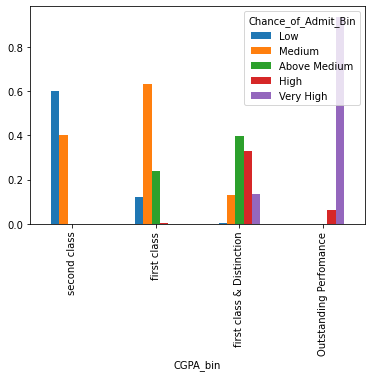

<Figure size 1080x576 with 0 Axes>

In [55]:
pd.crosstab(data['CGPA_bin'],data['Chance_of_Admit_Bin'],normalize='index').plot(kind='bar').figsize=(15,8)
plt.figure(figsize=(15,8))

- For Outstanding Perfomance students chance of admit for preffered university is high
- For second class students chance of admit is low
- For first class students chance of admit is medium
- For first class & Distinction students chance of admit is above medium

## Standardization of data 

In [56]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler to the dataset
scaler.fit(df)

# Transform the dataset to have zero mean and unit variance
X_standardized = scaler.transform(df)
X=pd.DataFrame(X_standardized, columns=[
 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance_of_Admit'])

In [57]:
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.051495
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.689797
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.477030
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,0.058582


In [58]:
y=X['Chance_of_Admit']
x=X.drop(['Chance_of_Admit'],axis=1)

In [59]:
#x['x0']=1
x

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152


In [60]:
y

0      1.406107
1      0.271349
2     -0.012340
3      0.555039
4     -0.508797
         ...   
495    1.051495
496    1.689797
497    1.477030
498    0.058582
499    0.838728
Name: Chance_of_Admit, Length: 500, dtype: float64

## Splitting the Data for Training and Testingm,

In [61]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=100,)

In [62]:
X_train

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [63]:
y_test

69     0.413194
29    -1.288944
471   -0.579720
344   -1.785400
54    -0.154185
         ...   
308   -0.225108
171    1.193340
457   -2.494624
75    -0.012340
311    0.838728
Name: Chance_of_Admit, Length: 150, dtype: float64

In [64]:
y_train

153    0.484116
84     1.547952
310    0.271349
494   -0.296030
126    0.909651
         ...   
343   -0.934332
359    0.625961
323   -0.721564
280   -0.296030
8     -1.572633
Name: Chance_of_Admit, Length: 350, dtype: float64

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train) # training stage

LinearRegression()

In [66]:
X_train.shape

(350, 7)

In [67]:
y_train.shape

(350,)

In [68]:
y_hat = model.predict(X_train)
print("Predicted Y Values")
print(y_hat[:3])
print("Actualy")
print(y_train[:3])

Predicted Y Values
[0.08550232 1.43262567 0.15408964]
Actualy
153    0.484116
84     1.547952
310    0.271349
Name: Chance_of_Admit, dtype: float64


In [69]:
model.score(X_train,y_train) # R^2 score

0.8132510822066584

In [70]:
print(model.coef_)
print(model.intercept_)

[0.090411   0.15138317 0.04242884 0.00388195 0.11296889 0.54621902
 0.09713738]
-0.024866812538764868


In [71]:
w=np.zeros((7,))
w=model.coef_
w0=model.intercept_
print('w:',w)
print('w0:',w0)

w: [0.090411   0.15138317 0.04242884 0.00388195 0.11296889 0.54621902
 0.09713738]
w0: -0.024866812538764868


In [72]:
w[5]

0.5462190201662886

In [73]:
w=np.reshape(w,(1,len(w)))
w.shape

(1, 7)

## Model

In [74]:
y_hat=np.dot(w,np.transpose(X_train))+w0
y_hat.shape

(1, 350)

In [75]:
X_train

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [76]:
y_hat

array([[ 8.55023226e-02,  1.43262567e+00,  1.54089639e-01,
        -5.70140696e-01,  8.69529436e-01,  1.33924826e+00,
         7.41409059e-01, -1.17428786e+00, -1.07093828e+00,
         1.36712736e-01,  1.06977143e+00, -1.73385112e-01,
        -3.34531841e-01, -1.31133466e+00,  1.33035350e-01,
        -2.38221894e-02, -1.04109283e+00,  8.66305650e-01,
        -9.15541443e-01, -6.01008990e-01,  5.79726122e-02,
         1.77649090e+00, -2.04715354e-01,  7.88278815e-01,
        -4.02561995e-01,  8.06078551e-01,  3.88423081e-01,
        -1.45788435e+00, -2.83982298e-01, -8.09610395e-01,
        -1.91889028e+00,  1.51133518e+00,  1.06345798e+00,
        -1.23815816e+00,  6.46926516e-01, -2.65885746e-01,
         1.10996644e+00,  5.96287569e-01,  3.25903385e-01,
        -8.85667491e-01,  2.94001644e-01, -1.56785369e+00,
        -1.15406653e+00, -1.47711776e+00,  1.07711273e-01,
        -1.52809579e+00, -1.43103905e+00, -5.82759951e-01,
         1.83281801e-01, -9.06212261e-01,  1.03664898e+0

In [77]:
w

array([[0.090411  , 0.15138317, 0.04242884, 0.00388195, 0.11296889,
        0.54621902, 0.09713738]])

- Here w[5] = 0.54621902  is the highest coefficient. So, the column CGPA is feature importance

## Display model coefficients with column names

In [78]:
w=model.coef_
columns=np.array(x.columns)
for i in range(len(w)):
    print(columns[i],'  :', w[i])

GRE_Score   : 0.09041100444228009
TOEFL_Score   : 0.15138316913460392
University_Rating   : 0.0424288418292271
SOP   : 0.003881950858450026
LOR    : 0.11296889349260134
CGPA   : 0.5462190201662886
Research   : 0.09713738365964285


## Scatterplot of y_predicted and y_actual


<AxesSubplot:xlabel='Chance_of_Admit'>

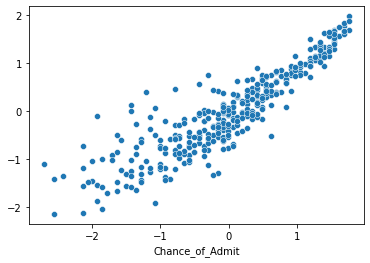

In [79]:
#sns.scatterplot(data=df,x=y_train,y=y_hat)
sns.scatterplot(x=y_train,y=model.predict(X_train))


- Scatterplot of y_predicted and y_actual shows a linear relationship

## Distribution of predicted and actual


In [80]:
y_test

69     0.413194
29    -1.288944
471   -0.579720
344   -1.785400
54    -0.154185
         ...   
308   -0.225108
171    1.193340
457   -2.494624
75    -0.012340
311    0.838728
Name: Chance_of_Admit, Length: 150, dtype: float64

In [81]:
y_test_pred=model.predict(X_test)

In [82]:
y_test_pred

array([ 0.97607234, -1.77440902, -0.66906869, -1.9331819 , -0.54505807,
        0.95824628, -0.94972795, -0.38151383,  0.65203107, -0.24316108,
       -0.39839899, -0.81207714,  1.22732156,  0.23598369, -0.59991421,
       -1.53965093, -0.9101761 ,  0.18894426, -1.16557055, -0.1271814 ,
        1.24135734, -0.77850785,  0.90478202,  0.74453432,  1.94795604,
       -0.84631611, -0.27988704,  1.51993933,  1.11697103, -0.14749348,
        0.48904655,  0.92582056,  0.19837706, -1.20538677,  0.1360968 ,
        0.42493282,  0.53947845, -1.02554683, -1.29212737, -0.14039671,
        1.60489426, -0.9149858 ,  0.81765601,  0.45935986,  0.64659667,
       -1.23477205, -0.86801973,  1.08201637,  1.62801231, -0.86830766,
        0.67853488, -0.08336846,  0.60338862,  1.90116695, -0.52067838,
        0.96080708, -0.71695757,  1.24316368,  0.35900833,  0.10310335,
       -0.24232526, -0.67403037, -1.71549464,  1.15696009, -0.49159212,
       -0.26258037, -0.11135112, -1.83187365,  0.82665037,  0.88

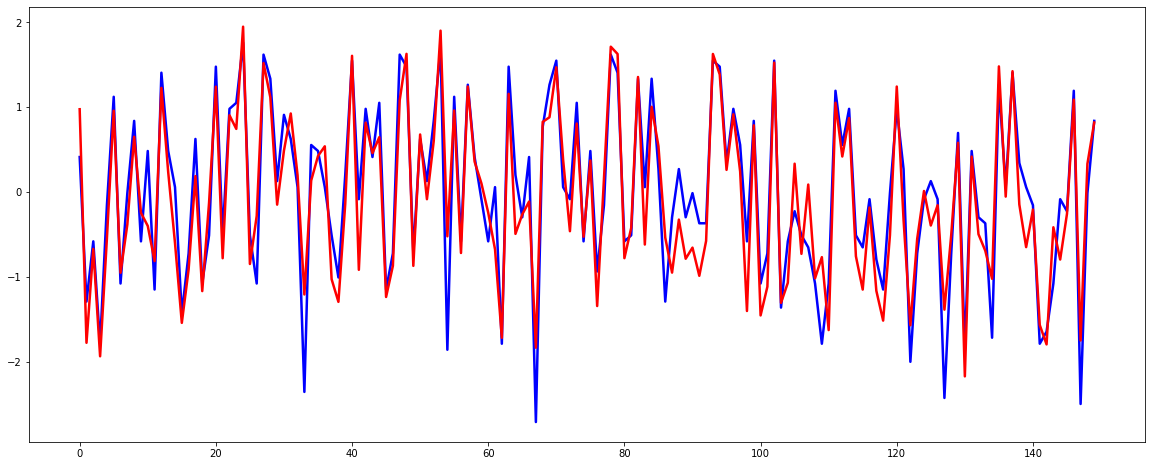

In [83]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.plot(c,y_test,color="blue",  linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred,color="red",  linewidth=2.5, linestyle="-")


## Distribution of error

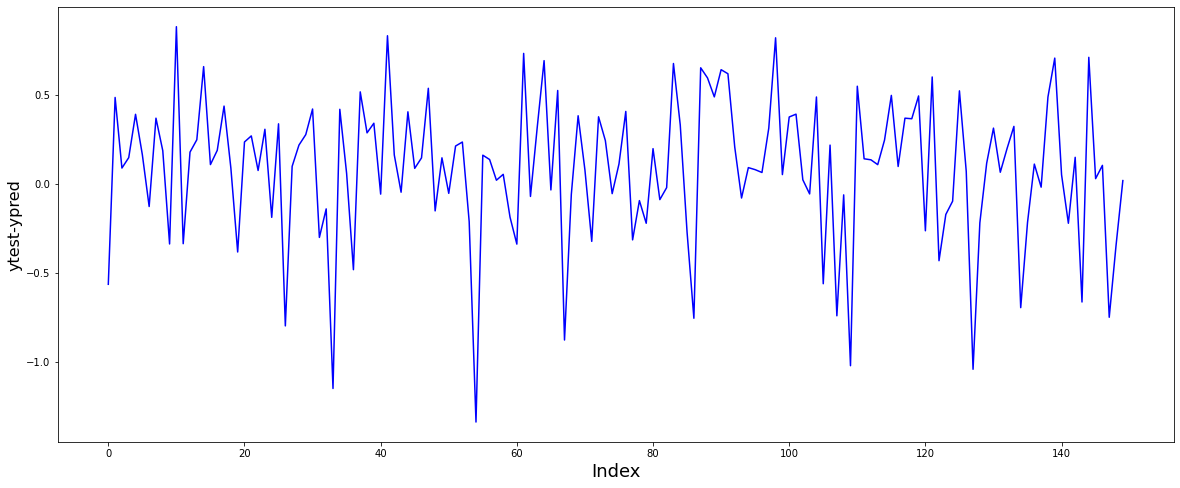

In [84]:
c = [i for i in range(0,150,1)]
plt.figure(figsize=(20,8))
plt.plot(c,y_test-y_test_pred,color="blue")
plt.xlabel('Index', fontsize=18)       # X-label
plt.ylabel('ytest-ypred', fontsize=16) # Y-label
plt.show()


## Testing the assumptions of the linear regression model 

### 1.Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) 

In [85]:
X_train

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [86]:
def multi_collinear():
    vif_1st=[]
    for i in X_train.columns:
        X1=X_train[i].values
        X2=X_train.drop(i,axis=1)
        X2=X2.values
        model.fit(X2, X1)
        X1_hat=model.predict(X2)
        den=sum(((X1-X1.mean())**2))
        num=sum((X1-X1_hat)**2)
        score=1-(num/den)
        vif=1/(1-(score))
        vif_1st.append(vif)
    return vif_1st
multi_collinear()

[4.75835961175147,
 3.726721622339553,
 2.4820604939391697,
 2.7333995945727474,
 1.9701828330346347,
 4.705215422225114,
 1.4869366111506095]

### VIF values of all columns are less than 5. So has less multicollinearity

### 2.The mean of residuals is nearly zero 

In [87]:
y_test_pred

array([ 0.97607234, -1.77440902, -0.66906869, -1.9331819 , -0.54505807,
        0.95824628, -0.94972795, -0.38151383,  0.65203107, -0.24316108,
       -0.39839899, -0.81207714,  1.22732156,  0.23598369, -0.59991421,
       -1.53965093, -0.9101761 ,  0.18894426, -1.16557055, -0.1271814 ,
        1.24135734, -0.77850785,  0.90478202,  0.74453432,  1.94795604,
       -0.84631611, -0.27988704,  1.51993933,  1.11697103, -0.14749348,
        0.48904655,  0.92582056,  0.19837706, -1.20538677,  0.1360968 ,
        0.42493282,  0.53947845, -1.02554683, -1.29212737, -0.14039671,
        1.60489426, -0.9149858 ,  0.81765601,  0.45935986,  0.64659667,
       -1.23477205, -0.86801973,  1.08201637,  1.62801231, -0.86830766,
        0.67853488, -0.08336846,  0.60338862,  1.90116695, -0.52067838,
        0.96080708, -0.71695757,  1.24316368,  0.35900833,  0.10310335,
       -0.24232526, -0.67403037, -1.71549464,  1.15696009, -0.49159212,
       -0.26258037, -0.11135112, -1.83187365,  0.82665037,  0.88

In [88]:
y_test

69     0.413194
29    -1.288944
471   -0.579720
344   -1.785400
54    -0.154185
         ...   
308   -0.225108
171    1.193340
457   -2.494624
75    -0.012340
311    0.838728
Name: Chance_of_Admit, Length: 150, dtype: float64

In [89]:
Residuals=np.array(y_test-y_test_pred)
Residuals

array([-0.56287849,  0.48546547,  0.08934906,  0.14778161,  0.39087279,
        0.16417149, -0.12644842,  0.36917334,  0.18669714, -0.33655855,
        0.88251524, -0.33502162,  0.17878578,  0.24813255,  0.65849611,
        0.10886259,  0.18861168,  0.43701677,  0.08939417, -0.38161584,
        0.23567239,  0.26971061,  0.07579097,  0.30696106, -0.18723674,
        0.33751887, -0.79628933,  0.09893518,  0.21821392,  0.27699777,
        0.42060405, -0.29985953, -0.13979516, -1.14739266,  0.41894184,
        0.05918342, -0.48089656,  0.51674959,  0.28687339,  0.34082338,
       -0.05694214,  0.83172291,  0.16291698, -0.04616601,  0.40489871,
        0.08767329,  0.14645531,  0.53685815, -0.15098258,  0.14674324,
       -0.05257385,  0.21287274,  0.23533959, -0.21137004, -1.3356443 ,
        0.16161069,  0.13723794,  0.02109888,  0.05418552, -0.18636624,
       -0.33739438,  0.73261227, -0.06990565,  0.32006964,  0.6920188 ,
       -0.03344969,  0.52454498, -0.87551773, -0.05884456,  0.38

In [90]:
np.mean(Residuals)

0.08288937512920824

- We can see that  mean of residuals is approxmatly equals to zero

### 3.Linearity of variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


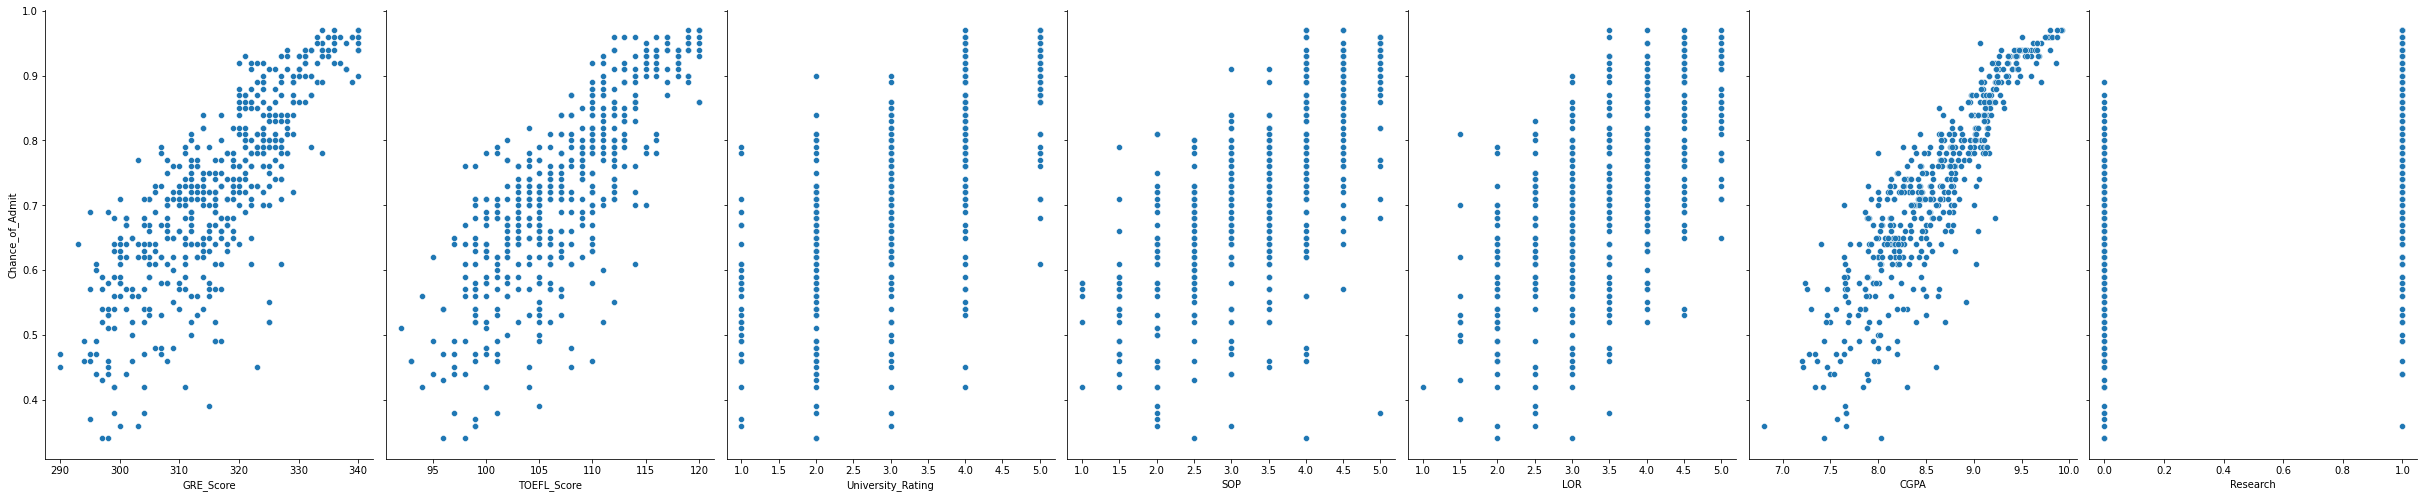

In [91]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR', 'CGPA', 'Research'], y_vars='Chance_of_Admit',size=7, aspect=0.7, kind='scatter')

- We can see that all features are are linear to dependent variable 'Chance of admit'

### 4.Test for Homoscedasticity

In [92]:
np.var(Residuals)

0.16460873092912473

- We can see the variance of residuals are very low . So it obey Homocedasticty

In [93]:
X_test

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
69,1.021637,1.285102,0.775582,1.137360,0.558125,0.965827,0.886405
29,-0.573563,-1.348304,-0.975168,-1.892906,-1.605151,-2.112585,-1.128152
471,-0.484941,-0.689952,-0.099793,-1.387862,0.558125,-0.805087,-1.128152
344,-1.902897,-1.842067,-0.975168,-1.892906,-1.605151,-2.046382,-1.128152
54,0.489904,0.462163,-0.099793,-0.377773,0.017306,-0.954043,-1.128152
...,...,...,...,...,...,...,...
308,-0.396319,0.132987,-0.099793,0.127271,-0.523513,-0.076861,-1.128152
171,1.553371,1.614278,1.650957,0.632315,1.098944,0.816871,0.886405
457,-1.902897,-1.348304,-1.850542,-1.387862,-2.145970,-1.665719,-1.128152
75,1.110260,1.120514,-0.975168,-1.387862,0.558125,-0.027209,0.886405


In [94]:
m=X_test.copy()
m['Residuals']=Residuals
m['predicted_y']=y_test_pred
m

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Residuals,predicted_y
69,1.021637,1.285102,0.775582,1.137360,0.558125,0.965827,0.886405,-0.562878,0.976072
29,-0.573563,-1.348304,-0.975168,-1.892906,-1.605151,-2.112585,-1.128152,0.485465,-1.774409
471,-0.484941,-0.689952,-0.099793,-1.387862,0.558125,-0.805087,-1.128152,0.089349,-0.669069
344,-1.902897,-1.842067,-0.975168,-1.892906,-1.605151,-2.046382,-1.128152,0.147782,-1.933182
54,0.489904,0.462163,-0.099793,-0.377773,0.017306,-0.954043,-1.128152,0.390873,-0.545058
...,...,...,...,...,...,...,...,...,...
308,-0.396319,0.132987,-0.099793,0.127271,-0.523513,-0.076861,-1.128152,0.029908,-0.255016
171,1.553371,1.614278,1.650957,0.632315,1.098944,0.816871,0.886405,0.104448,1.088893
457,-1.902897,-1.348304,-1.850542,-1.387862,-2.145970,-1.665719,-1.128152,-0.747839,-1.746785
75,1.110260,1.120514,-0.975168,-1.387862,0.558125,-0.027209,0.886405,-0.345009,0.332669


<AxesSubplot:xlabel='predicted_y', ylabel='Residuals'>

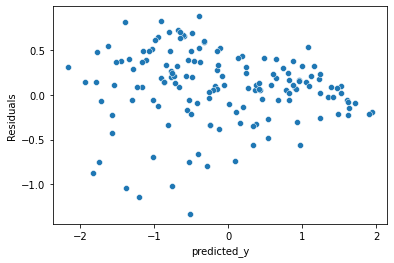

In [95]:
sns.scatterplot(x='predicted_y',y='Residuals',data=m)

- We can see that there is no Relation between predicted values and residuals

### 5.Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) 

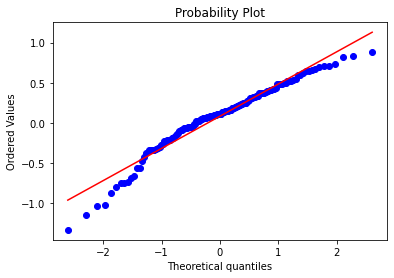

In [96]:
stats.probplot(Residuals,dist='norm',plot=plt)
plt.show()

<AxesSubplot:ylabel='Density'>

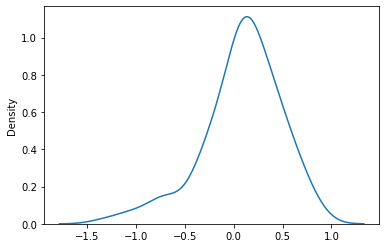

In [97]:
sns.kdeplot(Residuals)

-  We can see that almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line

Text(0, 0.5, 'Predicted Y')

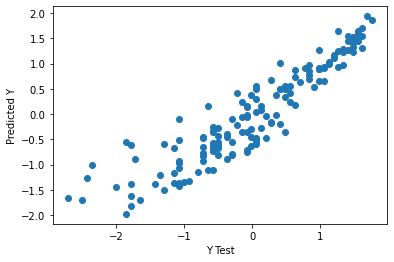

In [98]:
model.fit(X_test,y_test)
y_pred=model.predict(X_test)
## we can test homosedacity
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Model performance evaluation 

### mean absolute error & Root mean squired error

In [99]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.17147937943843536
r_square_value : 0.8355717634850118


## R2

In [100]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8355717634850118

### Train and test performances are checked

In [101]:
print('Train data accuracy =', model.score(X_train,y_train))

Train data accuracy = 0.8013958974500988


In [102]:
print('Test data accuracy =',model.score(X_test,y_test))

Test data accuracy = 0.8498936286507525


- test data have more accuracy than train data

### Checking for P-value Using STATSMODELS

In [103]:
import statsmodels.api as sm
X_sm = x
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_sm = sm.add_constant(X_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y,X_sm).fit()

# print the coefficients
lm_1.params

const               -3.473784e-16
GRE_Score            1.487321e-01
TOEFL_Score          1.197053e-01
University_Rating    4.813664e-02
SOP                  1.113691e-02
LOR                  1.105418e-01
CGPA                 5.073019e-01
Research             8.557436e-02
dtype: float64

In [104]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          8.21e-180
Time:                        21:57:20   Log-Likelihood:                -278.12
No. Observations:                 500   AIC:                             572.2
Df Residuals:                     492   BIC:                             605.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.474e-16      0.01

- By OLS method we can see that University Rating ,SOP ,const are insignificant features

In [105]:
X_c=pd.DataFrame(data=X_sm)
X_c['const'].value_counts()

1.0    500
Name: const, dtype: int64

In [106]:
X=x.copy()
X['constent']=1
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,constent
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,1
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,1
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,1
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,1
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,1


### Implementing the results and running the model again

In [112]:
X.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'constent', 'Chance_of_Admit'],
      dtype='object')

In [113]:
X_train


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [114]:
# Removing University Rating,GRE Score,SOP  from our dataset
X_train_new = X_train[['University_Rating','TOEFL_Score','LOR ','CGPA','Research']]
X_test_new = X_test[['University_Rating','TOEFL_Score','LOR ','CGPA','Research']]

In [115]:
# Model building
model.fit(X_train_new,y_train)

LinearRegression()

In [116]:
# Making predictions
y_pred_new = model.predict(X_test_new)

Text(0, 0.5, 'Sales')

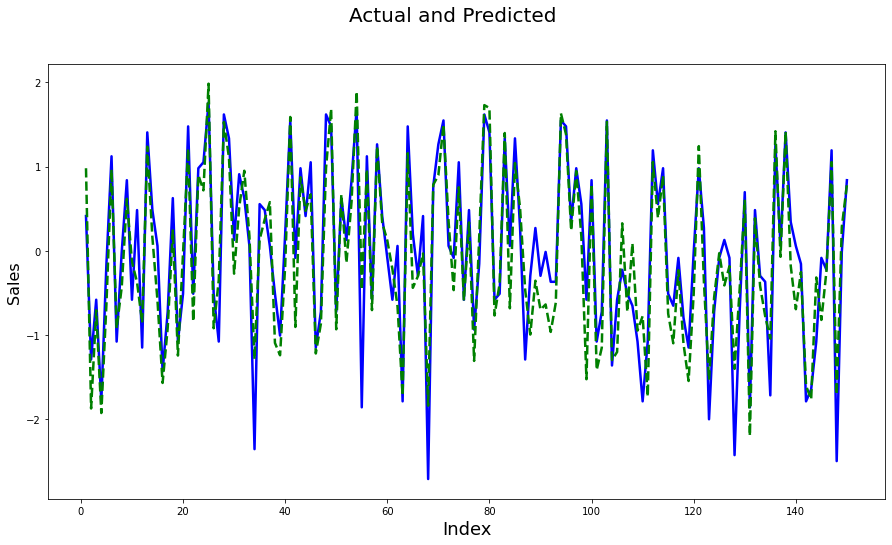

In [117]:
#Actual vs Predicted
c = [i for i in range(1,151,1)]
fig = plt.figure(figsize=(15,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_new, color="green",  linewidth=2.5, linestyle="--")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)   

In [118]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
r_squared = r2_score(y_test, y_pred_new)

In [119]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.18211763892286306
r_square_value : 0.8253709436993226


- Accuracy decrese by small amount when removing  features GRE Score,SOP 
- We only need to remove features when both ols method and vif score of features are wrong

## Generalisation
## Ridge and Lasso Regression

Let's now try predicting Chance of admit, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression


In [120]:
X_train

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
153,0.667148,-0.360777,-0.099793,-0.377773,0.558125,0.287252,-1.128152
84,2.085104,1.285102,1.650957,1.137360,1.098944,1.445794,0.886405
310,0.312659,-0.525364,-0.099793,-0.377773,0.017306,0.270702,0.886405
494,-1.371164,-1.348304,-0.099793,-0.882817,-1.605151,-0.209266,0.886405
126,0.578526,0.955926,-0.099793,0.632315,-0.523513,1.230636,0.886405
...,...,...,...,...,...,...,...
343,-1.016674,-0.689952,-0.975168,-0.882817,0.017306,-0.738885,-1.128152
359,0.401282,-0.031601,-0.975168,-1.387862,-2.145970,-0.225816,-1.128152
323,-1.016674,-0.854540,-0.975168,-1.387862,-1.064332,-0.656132,-1.128152
280,-0.484941,-0.854540,-0.099793,1.137360,0.558125,0.105196,0.886405


In [121]:
y_train

153    0.484116
84     1.547952
310    0.271349
494   -0.296030
126    0.909651
         ...   
343   -0.934332
359    0.625961
323   -0.721564
280   -0.296030
8     -1.572633
Name: Chance_of_Admit, Length: 350, dtype: float64

In [122]:

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()


In [123]:

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 



Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [124]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009363,0.007645,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.858930,0.719428,0.802121,0.763438,...,0.790772,0.046859,21,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731
1,0.006230,0.007631,0.000000,0.000000,0.001,{'alpha': 0.001},0.858930,0.719428,0.802121,0.763438,...,0.790772,0.046859,19,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731
2,0.006281,0.007693,0.003113,0.006227,0.005,{'alpha': 0.005},0.858931,0.719429,0.802121,0.763440,...,0.790772,0.046859,18,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731
3,0.006257,0.007663,0.000000,0.000000,0.007,{'alpha': 0.007},0.858931,0.719429,0.802120,0.763441,...,0.790772,0.046859,17,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731
4,0.006251,0.007656,0.003118,0.006235,0.001,{'alpha': 0.001},0.858930,0.719428,0.802121,0.763438,...,0.790772,0.046859,19,0.794999,0.828308,0.813622,0.824048,0.809394,0.814074,0.011731


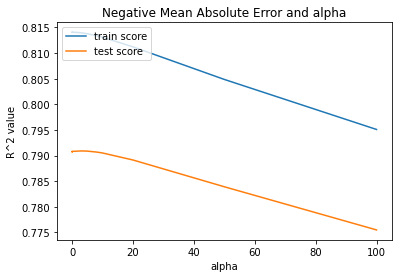

In [125]:

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R^2 value')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [126]:

alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_


array([0.10450454, 0.15398373, 0.04601386, 0.011072  , 0.11489609,
       0.51643932, 0.09517811])

In [127]:
y_pred_ridge=ridge.predict(X_test)

In [128]:
mse = mean_squared_error(y_test, y_pred_ridge)
r_squared = r2_score(y_test, y_pred_ridge)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.1693704358941976
r_square_value : 0.8375939883672355


- In Ridge regression By 5 fold cross validation method we can see that our model can accuratly predict at confidently above 83.75%

## Lasso

In [129]:
lasso = Lasso()

In [130]:
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.005, 0.007, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [131]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006249,0.007653,0.000000,0.000000,0.0001,{'alpha': 0.0001},0.858945,0.719471,0.802133,0.763562,...,0.790815,0.046838,6,0.794999,0.828307,0.813622,0.824048,0.809394,0.814074,0.011731
1,0.000000,0.000000,0.003129,0.006257,0.001,{'alpha': 0.001},0.859080,0.719856,0.802231,0.764679,...,0.791199,0.046651,4,0.794985,0.828297,0.813620,0.824035,0.809392,0.814066,0.011730
2,0.003125,0.006250,0.006250,0.007655,0.005,{'alpha': 0.005},0.859494,0.720504,0.802624,0.769378,...,0.792581,0.046146,3,0.794668,0.828238,0.813580,0.823716,0.809348,0.813910,0.011770
3,0.000000,0.000000,0.000000,0.000000,0.007,{'alpha': 0.007},0.858857,0.720687,0.802800,0.771558,...,0.793031,0.045728,2,0.794613,0.828202,0.813541,0.823396,0.809304,0.813811,0.011730
4,0.000000,0.000000,0.003126,0.006251,0.001,{'alpha': 0.001},0.859080,0.719856,0.802231,0.764679,...,0.791199,0.046651,4,0.794985,0.828297,0.813620,0.824035,0.809392,0.814066,0.011730


In [132]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

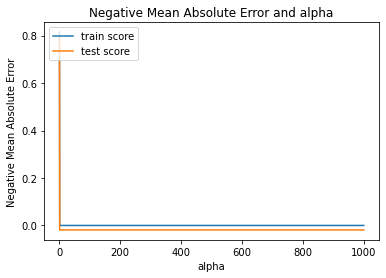

In [133]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


- By hyperparameter tuning best alpha =0.0001

In [134]:

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_

array([0.09041277, 0.15135204, 0.04240747, 0.0038597 , 0.1129189 ,
       0.54622509, 0.09708024])

In [135]:
y_pred_lasso=lasso.predict(X_test)

In [136]:
mse = mean_squared_error(y_test, y_pred_lasso)
r_squared = r2_score(y_test, y_pred_lasso)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.17146829923334972
r_square_value : 0.8355823880778254


- In lasso regression By 5 fold cross validation method we can see that our model can accuratly predict at confidently above 83.55%

# Insights based the Evaluation
- Based on the analysis we donot have outliers for independent features like 'GRE Score', 'TOEFL Score' & 'CGPA'.
- 'Chance of Admit' is slightly left screwed. Since 'Chance of Admit' is a slightly left skewed, we don't have to handle it.
- Among students who have done research vs those who did not, 56 % said Yes and 44 % said No
- More than 50% of the data has a university rating of 3 or 2
- A majority of students (56%) have letter of recommendation values between 3.0 and 4.5
- A strong positive relationship exists between Chance of admit and numerical variables (GRE & TOEFL score and CGPA).
- GRE Score , TOFEL Score and CGPA are highly correlated (0.80). We should drop two of these.
- Based on the analysis an upward trend for each categorical variable. A higher rating or value increases the chance of admission

# Recommendations
- CGPA and Research are the only two variables which are important in making the prediction for Chance of Admit.
- CGPA is the most important varibale in making the prediction for the Chance of Admit.
- Features which influence the chance of Admit are
 > - GRE Score
 > - TOEFL Score
 > - CGPA
 > - LOR greater or equal to than 4.5
- A higher University rating will increases the chance of admission
- A higher value of LOR and SPO will also increases the chance of admission for the student